In [2]:
# we import pandas library for data reading from a file 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [4]:
df=pd.read_csv("advertising_and_sales_clean.csv")

In [5]:
df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [6]:
df.shape

(4546, 5)

In [8]:
df.isnull().sum()

tv              0
radio           0
social_media    0
influencer      0
sales           0
dtype: int64

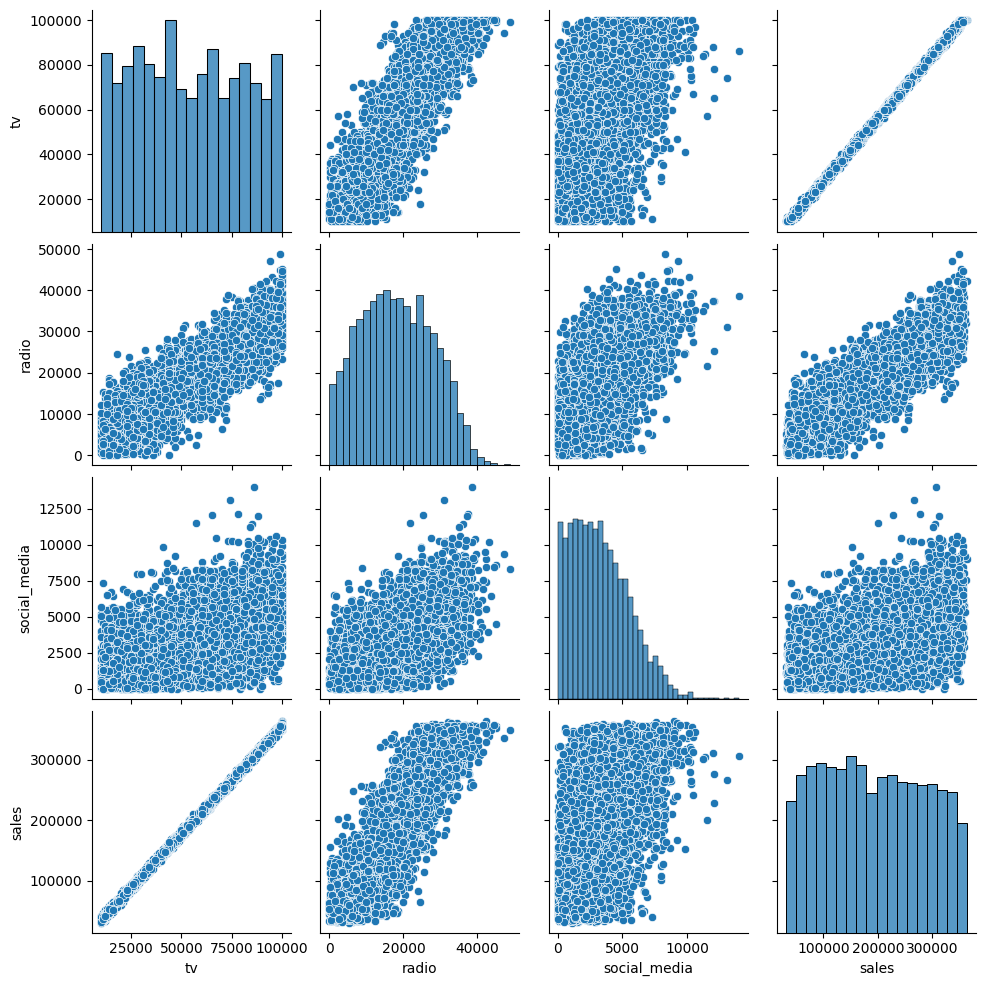

In [9]:
import seaborn as sns
sns.pairplot(df)

In [10]:
df.columns

Index(['tv', 'radio', 'social_media', 'influencer', 'sales'], dtype='object')

In [19]:
df["influencer"].unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [20]:
df["influencer"]=df["influencer"].map({'Mega':1, 'Micro':2, 'Nano':3, 'Macro':4})

In [21]:
x=df.drop("sales",axis=1)

In [22]:
y=df["sales"]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

models=xgb_model.fit(X_train, y_train)

xgb_pred = models.predict(X_test)


In [29]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("mse",mean_squared_error(y_test,xgb_pred))
print("mae", mean_absolute_error(y_test,xgb_pred))
print("Rmse",r2_score(y_test,xgb_pred))

mse 9155119.45645123
mae 2428.3623739697796
Rmse 0.9989114533975554


In [30]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print("mse",mean_squared_error(y_test,rf_pred))
print("mae", mean_absolute_error(y_test,rf_pred))
print("Rmse",r2_score(y_test,rf_pred))

mse 11283963.872191094
mae 2729.4642287362512
Rmse 0.9986583331224012


In [31]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

In [32]:
print("mse",mean_squared_error(y_test,dt_pred))
print("mae", mean_absolute_error(y_test,dt_pred))
print("Rmse",r2_score(y_test,dt_pred))

mse 19220166.12087704
mae 3513.4047802197797
Rmse 0.9977147161619438


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np

# Model
gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Train
gbr_model.fit(X_train, y_train)

# Predict
gbr_pred = gbr_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, gbr_pred)
rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))
r2 = r2_score(y_test, gbr_pred)

print("Gradient Boosting Regressor Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

Gradient Boosting Regressor Results:
MAE: 2357.9068741370343
RMSE: 2950.9310347247056
R2 Score: 0.9989646167592795
